In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2019-02-25 12:53:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [text/plain]
Saving to: ‘abalone.data’

abalone.data        100%[=====================>] 187.38K   363KB/s   in 0.5s   

2019-02-25 12:53:16 (363 KB/s) - ‘abalone.data’ saved [191873/191873]



We need to predict the Age , by looking at the physical measurements 

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 

In [3]:
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age']

Df = pd.read_csv('abalone.data', sep = ',' , names=col_names)

Df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
Df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
Df.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [7]:
Df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [8]:
print(min(Df['Height'])) # Minimum height is 0 , this isn't possible lets remove them 

0.0


In [9]:
Df = Df.loc[Df['Height']!=0.0]

In [10]:
print(min(Df['Height']))

0.01


In [14]:
X = Df.iloc[:,:8].values
Y = Df.iloc[:,-1].values

In [15]:
# It contains categorical data (Sex) like M , F , L . first lets encode them and then one hot encode 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [16]:
# Now one hot encoding the labels encoded 

ct = ColumnTransformer([('onehot', OneHotEncoder(categories='auto'), [0])], remainder='passthrough')

X = ct.fit_transform(X)
X = X[:, 1:] # Escaping from dummy variable trap

Splitting the data 

In [17]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.25 , random_state = 2)

In [18]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(3131, 9)
(1044, 9)
(3131,)
(1044,)


Applying Standard Scaling 

In [19]:
from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()

Xtrain = Scale.fit_transform(Xtrain)
Xtest = Scale.transform(Xtest)

print(Xtrain.shape)
print(Xtest.shape)

(3131, 9)
(1044, 9)


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 3)
regressor.fit(Xtrain,Ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
Ypred = regressor.predict(Xtest)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Ytest , Ypred)

print(MSE)

6.062047679863771


Visualizing the Predictions and Targets 

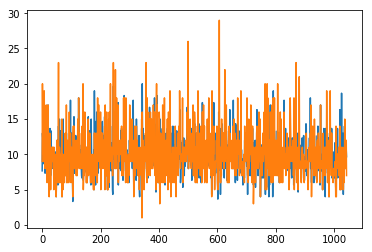

In [25]:
plt.plot(Ypred)
plt.plot(Ytest)
plt.show()

Checking performance on different estimators 

Check 1

In [26]:
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(Xtrain,Ytrain)

Ypred = regressor.predict(Xtest)

MSE = mean_squared_error(Ytest , Ypred)

print(MSE)  # MSE decreased from 6.06 to 5.58

5.586312260536398


Check 2

In [27]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(Xtrain,Ytrain)

Ypred = regressor.predict(Xtest)

MSE = mean_squared_error(Ytest , Ypred)

print(MSE)  # MSE decreased from 5.58 to 5.34

5.345957662835249


Check 3 

In [28]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(Xtrain,Ytrain)

Ypred = regressor.predict(Xtest)

MSE = mean_squared_error(Ytest , Ypred)

print(MSE)  # MSE decreased from 5.34 to 5.21

5.2190336951894425
